# Exploratory Data Analysis for Iowa Liquor Sales

To prepare for feature selection and feature engineering, this notebook will explore the data properties, data quality and predictive power of the BigQuery data. 

To speed up the process, I will only be using data from 2018 onwards instead of the full dataset from 2012. 

## Data Sources

selected_data.pkl: Retrieved from [Google BigQuery](https://console.cloud.google.com/marketplace/product/iowa-department-of-commerce/iowa-liquor-sales?project=australiarain&folder=&organizationId=) public dataset and contained summarised sales data from 2018 onwards

## Revision History

- 04-15-2021: Started the project

In [1]:
from pathlib import Path
from datetime import datetime
import pandas as pd
import numpy as np

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# EDA

# Chi-square test and t-test for EDA
from scipy.stats import chi2_contingency
from scipy import stats

# Logistic correlation for EDA
import statsmodels.api as sm

# Data Visualisation for EDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set up matplotlib so it uses Jupyter's graphical backend when plotting the charts
%matplotlib inline 

# Adjust display options for pandas dataframes
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 60)
pd.set_option('float_format','{:,.2f}'.format)

## File Locations

In [2]:
raw_data = Path.cwd().parent / "data" / "raw" / "all_sales.pkl"

## Load the data & basic exploration

In [3]:
liquor_df = pd.read_pickle(raw_data)
liquor_df.tail(10)

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
7966717,INV-35465900010,2021-03-31,2522,Hy-Vee Wine and Spirits / Spirit Lake,Hwy 9 & 71,Spirit Lake,51360,None,30,DICKINSON,1701100,Temporary & Specialty Packages,035,BACARDI USA INC,64282,Bacardi Tropical,6,750,8.25,12.38,6,74.28,4.50,1.18
7966718,INV-35480100023,2021-03-31,2529,Hy-Vee Drugstore #4 / Cedar Rapids,4825 Johnson Ave NW,Cedar Rapids,52405,POINT (-91.73337 41.968343),57,LINN,1032200,Imported Flavored Vodka,370,PERNOD RICARD USA,34030,Absolut Citron,12,750,9.99,14.99,2,29.98,1.50,0.39
7966719,INV-35479200015,2021-03-31,5636,Big Discount Liquor,5427 Center Point Rd,Cedar Rapids,52402,None,57,LINN,1091200,Neutral Grain Spirits,384,PIEDMONT DISTILLERS INC,76032,Midnight Moon Original,6,750,11.50,17.25,2,34.50,1.50,0.39
7966720,INV-35474300026,2021-03-31,3811,Wal-Mart 1431 / Keokuk,300 North Park Dr,Keokuk,52632,POINT (-91.407263 40.418589),56,LEE,1062200,White Rum,055,SAZERAC NORTH AMERICA,46142,Caliber Silver Rum,6,1750,7.35,11.03,6,66.18,10.50,2.77
7966721,INV-35481200147,2021-03-31,2521,Hy-Vee Food and Drug / Grand / WDM,1990 Grand Avenue,West Des Moines,50265,POINT (-93.73162 41.571127),77,POLK,1011200,Straight Bourbon Whiskies,085,Brown Forman Corp.,920376,SOOH Old Forester 1920,6,750,30.98,46.47,2,89.94,1.50,0.39
7966722,INV-35474700016,2021-03-31,2191,Keokuk Spirits,1013 Main,Keokuk,52632,POINT (-91.387797 40.400038),56,LEE,1012100,Canadian Whiskies,322,Prestige Wine & Spirits Group / United States ...,15248,Windsor Canadian PET,6,1750,9.50,14.25,6,85.50,10.50,2.77
7966723,INV-35478600197,2021-03-31,2590,Hy-Vee Food Store #5 / Cedar Rapids,3235 Oakland Road NE,Cedar Rapids,52402,POINT (-91.658105 42.010971),57,LINN,1012100,Canadian Whiskies,380,Phillips Beverage,14518,Revel Stoke Peanut Butter Whisky Mini,12,50,4.60,6.90,1,6.90,0.05,0.01
7966724,INV-35475400023,2021-03-31,2611,Hy-Vee Drugstore / Ottumwa,1140 North Jefferson St,Ottumwa,52501,POINT (-92.401538 41.026754000000004),90,WAPELLO,1031200,American Flavored Vodka,380,Phillips Beverage,41681,UV Red Cherry,6,1750,11.50,17.25,6,103.50,10.50,2.77
7966725,INV-35479400063,2021-03-31,2605,Hy-Vee Drugstore #5 / Cedar Rapids,2001 Blairs Ferry Road NE,Cedar Rapids,52402,POINT (-91.668919 42.034799),57,LINN,1082000,Imported Cordials & Liqueurs,192,"Mast-Jagermeister US, Inc",65368,Jagermeister Cold Brew Coffee Liqueur,6,750,14.35,21.53,1,21.53,0.75,0.19
7966726,INV-35466400019,2021-03-31,3622,Wal-Mart 1415 / Spirit Lake,2600 Hwy 71,Spirit Lake,51360,POINT (-95.126535 43.416452),30,DICKINSON,1062400,Spiced Rum,260,DIAGEO AMERICAS,43337,Captain Morgan Original Spiced,12,1000,11.75,17.63,12,211.56,12.00,3.17


In [4]:
liquor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7966727 entries, 0 to 7966726
Data columns (total 24 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   invoice_and_item_number  object        
 1   date                     datetime64[ns]
 2   store_number             object        
 3   store_name               object        
 4   address                  object        
 5   city                     object        
 6   zip_code                 object        
 7   store_location           object        
 8   county_number            object        
 9   county                   object        
 10  category                 object        
 11  category_name            object        
 12  vendor_number            object        
 13  vendor_name              object        
 14  item_number              object        
 15  item_description         object        
 16  pack                     int64         
 17  bottle_volume_ml         in

In [5]:
liquor_df.describe()

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,"7,966,727.00","7,966,727.00","7,966,727.00","7,966,727.00","7,966,727.00","7,966,727.00","7,966,727.00","7,966,727.00"
mean,12.32,871.61,10.53,15.79,11.20,147.49,9.29,2.45
std,8.06,522.32,9.36,14.04,31.51,509.32,37.55,9.92
min,1.00,20.00,0.33,0.50,0.00,0.00,0.02,0.00
25%,6.00,750.00,5.54,8.31,3.00,35.28,1.50,0.40
50%,12.00,750.00,8.43,12.65,6.00,78.00,4.80,1.26
75%,12.00,"1,000.00",13.00,19.50,12.00,148.68,10.50,2.77
max,60.00,"6,000.00","1,871.20","2,806.80","13,200.00","279,557.28","13,200.00","3,487.07"


In [6]:
# Check for missing values
liquor_df.isnull().sum()

invoice_and_item_number         0
date                            0
store_number                    0
store_name                      0
address                      6657
city                         6657
zip_code                     6657
store_location             739268
county_number                6659
county                       6657
category                     5621
category_name                5621
vendor_number                   6
vendor_name                     6
item_number                     0
item_description                0
pack                            0
bottle_volume_ml                0
state_bottle_cost               0
state_bottle_retail             0
bottles_sold                    0
sale_dollars                    0
volume_sold_liters              0
volume_sold_gallons             0
dtype: int64

## Univariate Analysis

### Categorical features

In [7]:
# Check the number of unique values (i.e. cardinality) for each categorical feature
cat_feature = ['date', 'city', 'county', 'category_name', 'vendor_name', 'item_description']
liquor_df[cat_feature].nunique()

date                 847
city                 446
county               132
category_name         59
vendor_name          289
item_description    5940
dtype: int64

A quick background check showed Iowa has 99 counties. Therefore, the 'county' feature might contain inconsistent values, which need to be checked and dealt with later. 

Additionally, such a high cardinality across all categorical features make it slightly more challenging to visualise the potential correlation between liquor demand and each categorical feature with bar plot at a later stage. 

#### date

In [8]:
# Create new features for year, month and day of the week
liquor_df['year'] = pd.DatetimeIndex(liquor_df['date']).year
liquor_df['month'] = pd.DatetimeIndex(liquor_df['date']).month
liquor_df['day_of_week'] = pd.DatetimeIndex(liquor_df['date']).dayofweek
liquor_df

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day_of_week
0,INV-09565300015,2018-01-02,5151,IDA Liquor,"500, Hwy 175",Ida Grove,51445,None,47,IDA,1022100,Mixto Tequila,065,Jim Beam Brands,89786,Sauza Gold,12,750,9.50,14.25,4,56.72,3.00,0.79,2018,1,1
1,INV-09556000113,2018-01-02,2524,Hy-Vee Food Store / Dubuque,3500 Dodge St,Dubuque,52001,None,31,DUBUQUE,1091300,Neutral Grain Spirits Flavored,384,PIEDMONT DISTILLERS INC,76042,Midnight Moon Blackberry,6,750,11.50,17.25,2,34.50,1.50,0.40,2018,1,1
2,INV-09555600025,2018-01-02,3632,Wal-Mart 2004 / Dubuque,4200 Dodge St,Dubuque,52003,POINT (-90.736955 42.489041),31,DUBUQUE,1062500,Flavored Rum,370,PERNOD RICARD USA,42716,Malibu Coconut Rum,12,750,7.49,11.24,12,134.88,9.00,2.38,2018,1,1
3,INV-09556500061,2018-01-02,2465,Sid's Beverage Shop,2727 Dodge St,Dubuque,52003,POINT (-90.705328 42.491862),31,DUBUQUE,1062500,Flavored Rum,260,DIAGEO AMERICAS,43299,Captain Morgan Coconut,12,750,8.26,12.39,1,12.39,0.75,0.20,2018,1,1
4,INV-09560000001,2018-01-02,2587,Hy-Vee Food Store / Johnston,5750 Merle Hay Road,Johnston,50131,POINT (-93.697731 41.665172),77,POLK,1012300,Single Malt Scotch,240,William Grant & Sons Inc,4367,Balvenie Caribbean Cask 14yr,6,750,39.96,59.94,2,119.88,1.50,0.40,2018,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7966722,INV-35474700016,2021-03-31,2191,Keokuk Spirits,1013 Main,Keokuk,52632,POINT (-91.387797 40.400038),56,LEE,1012100,Canadian Whiskies,322,Prestige Wine & Spirits Group / United States ...,15248,Windsor Canadian PET,6,1750,9.50,14.25,6,85.50,10.50,2.77,2021,3,2
7966723,INV-35478600197,2021-03-31,2590,Hy-Vee Food Store #5 / Cedar Rapids,3235 Oakland Road NE,Cedar Rapids,52402,POINT (-91.658105 42.010971),57,LINN,1012100,Canadian Whiskies,380,Phillips Beverage,14518,Revel Stoke Peanut Butter Whisky Mini,12,50,4.60,6.90,1,6.90,0.05,0.01,2021,3,2
7966724,INV-35475400023,2021-03-31,2611,Hy-Vee Drugstore / Ottumwa,1140 North Jefferson St,Ottumwa,52501,POINT (-92.401538 41.026754000000004),90,WAPELLO,1031200,American Flavored Vodka,380,Phillips Beverage,41681,UV Red Cherry,6,1750,11.50,17.25,6,103.50,10.50,2.77,2021,3,2
7966725,INV-35479400063,2021-03-31,2605,Hy-Vee Drugstore #5 / Cedar Rapids,2001 Blairs Ferry Road NE,Cedar Rapids,52402,POINT (-91.668919 42.034799),57,LINN,1082000,Imported Cordials & Liqueurs,192,"Mast-Jagermeister US, Inc",65368,Jagermeister Cold Brew Coffee Liqueur,6,750,14.35,21.53,1,21.53,0.75,0.19,2021,3,2


Note: For the feature day_of_week, it is assumed the week starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6.

#### city

In [9]:
# Review records with missing values
null_city = liquor_df[liquor_df['city'].isnull()]
null_city

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day_of_week
618,INV-09571700006,2018-01-02,4777,Casey's General Store #1365 / Paullina,None,None,None,None,None,None,1031100,American Vodkas,297,Laird & Company,35916,Five O'clock Vodka,12,750,3.37,5.06,12,60.72,9.00,2.38,2018,1,1
2796,INV-09571700004,2018-01-02,4777,Casey's General Store #1365 / Paullina,None,None,None,None,None,None,1011200,Straight Bourbon Whiskies,065,Jim Beam Brands,19066,Jim Beam,12,750,10.49,15.74,3,47.22,2.25,0.59,2018,1,1
3182,INV-09571700001,2018-01-02,4777,Casey's General Store #1365 / Paullina,None,None,None,None,None,None,1062400,Spiced Rum,260,DIAGEO AMERICAS,1799,Captain Morgan Spiced Barrel,6,1750,18.00,27.00,6,162.00,10.50,2.77,2018,1,1
3712,INV-09571700002,2018-01-02,4777,Casey's General Store #1365 / Paullina,None,None,None,None,None,None,1012100,Canadian Whiskies,115,CONSTELLATION BRANDS INC,11771,Black Velvet Mini,10,600,6.80,10.20,4,40.80,2.40,0.63,2018,1,1
4025,INV-09571700010,2018-01-02,4777,Casey's General Store #1365 / Paullina,None,None,None,None,None,None,1081600,Whiskey Liqueur,421,SAZERAC COMPANY INC,64864,Fireball Cinnamon Whisky,24,375,5.33,8.00,10,80.00,3.75,0.99,2018,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7778431,INV-34798100003,2021-03-05,4934,Casey's General Store #2811 / Springville,None,None,None,None,None,None,1012100,Canadian Whiskies,259,Heaven Hill Brands,11774,Black Velvet,24,375,3.07,4.61,24,110.64,9.00,2.37,2021,3,4
7778924,INV-34798100004,2021-03-05,4934,Casey's General Store #2811 / Springville,None,None,None,None,None,None,1031100,American Vodkas,301,FIFTH GENERATION INC,38174,Titos Handmade Vodka,12,375,5.42,8.13,12,97.56,4.50,1.18,2021,3,4
7780157,INV-34798100005,2021-03-05,4934,Casey's General Store #2811 / Springville,None,None,None,None,None,None,1032100,Imported Vodkas,115,CONSTELLATION BRANDS INC,34820,Svedka 80prf,12,750,8.25,12.38,12,148.56,9.00,2.37,2021,3,4
7780628,INV-34798100009,2021-03-05,4934,Casey's General Store #2811 / Springville,None,None,None,None,None,None,1062200,White Rum,035,BACARDI USA INC,43126,Bacardi Superior,12,750,8.26,12.39,4,49.56,3.00,0.79,2021,3,4


Since the store_name includes city name (e.g. Springville, Paullina), I will extract the city name from store_name to impute missing values. 

In [10]:
# Define a function to sort unique values of categorical feature to check for data validity and consistency
def sort_unique_values(feature):
    unique_values = feature.unique()
    not_null_values = [x for x in unique_values if x != None]
    print("There are ", len(not_null_values), " values that are not null.")
    return sorted(not_null_values)

In [11]:
sort_unique_values(liquor_df['city'])

There are  446  values that are not null.


['Ackley',
 'Adair',
 'Adel',
 'Afton',
 'Akron',
 'Albert City',
 'Albia',
 'Albion',
 'Alburnett',
 'Alden',
 'Algona',
 'Allerton',
 'Allison',
 'Alta',
 'Alton',
 'Altoona',
 'Amana',
 'Ames',
 'Anamosa',
 'Anita',
 'Ankeny',
 'Anthon',
 'Aplington',
 'Arlington',
 'Armstrong',
 "Arnold's Park",
 'Arnolds Park',
 'Atkins',
 'Atlantic',
 'Audubon',
 'Aurelia',
 'Avoca',
 'Baldwin',
 'Bancroft',
 'Baxter',
 'Bedford',
 'Belle Plaine',
 'Bellevue',
 'Belmond',
 'Bettendorf',
 'Bevington',
 'Blairstown',
 'Bloomfield',
 'Blue Grass',
 'Bondurant',
 'Boone',
 'Britt',
 'Brooklyn',
 'Buffalo',
 'Buffalo Center',
 'Burlington',
 'Bussey',
 'Calmar',
 'Camanche',
 'Cambridge',
 'Carlisle',
 'Carroll',
 'Carter Lake',
 'Cascade',
 'Casey',
 'Cedar Falls',
 'Cedar Rapids',
 'Center Point',
 'Centerville',
 'Central City',
 'Chariton',
 'Charles City',
 'Cherokee',
 'Clarence',
 'Clarinda',
 'Clarion',
 'Clarksville',
 'Clear Lake',
 'ClearLake',
 'Clermont',
 'Clinton',
 'Clive',
 'Coggon',


In [12]:
# Correct inconsistent name of cities
liquor_df['city'] = liquor_df['city'].replace({"Arnold's Park": 'Arnolds Park'
                                               , 'ClearLake': 'Clear Lake'
                                               , 'MUSCATINE': 'Muscatine'
                                               , 'SAGEVILLE': 'Sageville'})

#### county

In [13]:
# Review records with missing values
null_county = liquor_df[liquor_df['county'].isnull()]
null_county

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day_of_week
618,INV-09571700006,2018-01-02,4777,Casey's General Store #1365 / Paullina,None,None,None,None,None,None,1031100,American Vodkas,297,Laird & Company,35916,Five O'clock Vodka,12,750,3.37,5.06,12,60.72,9.00,2.38,2018,1,1
2796,INV-09571700004,2018-01-02,4777,Casey's General Store #1365 / Paullina,None,None,None,None,None,None,1011200,Straight Bourbon Whiskies,065,Jim Beam Brands,19066,Jim Beam,12,750,10.49,15.74,3,47.22,2.25,0.59,2018,1,1
3182,INV-09571700001,2018-01-02,4777,Casey's General Store #1365 / Paullina,None,None,None,None,None,None,1062400,Spiced Rum,260,DIAGEO AMERICAS,1799,Captain Morgan Spiced Barrel,6,1750,18.00,27.00,6,162.00,10.50,2.77,2018,1,1
3712,INV-09571700002,2018-01-02,4777,Casey's General Store #1365 / Paullina,None,None,None,None,None,None,1012100,Canadian Whiskies,115,CONSTELLATION BRANDS INC,11771,Black Velvet Mini,10,600,6.80,10.20,4,40.80,2.40,0.63,2018,1,1
4025,INV-09571700010,2018-01-02,4777,Casey's General Store #1365 / Paullina,None,None,None,None,None,None,1081600,Whiskey Liqueur,421,SAZERAC COMPANY INC,64864,Fireball Cinnamon Whisky,24,375,5.33,8.00,10,80.00,3.75,0.99,2018,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7778431,INV-34798100003,2021-03-05,4934,Casey's General Store #2811 / Springville,None,None,None,None,None,None,1012100,Canadian Whiskies,259,Heaven Hill Brands,11774,Black Velvet,24,375,3.07,4.61,24,110.64,9.00,2.37,2021,3,4
7778924,INV-34798100004,2021-03-05,4934,Casey's General Store #2811 / Springville,None,None,None,None,None,None,1031100,American Vodkas,301,FIFTH GENERATION INC,38174,Titos Handmade Vodka,12,375,5.42,8.13,12,97.56,4.50,1.18,2021,3,4
7780157,INV-34798100005,2021-03-05,4934,Casey's General Store #2811 / Springville,None,None,None,None,None,None,1032100,Imported Vodkas,115,CONSTELLATION BRANDS INC,34820,Svedka 80prf,12,750,8.25,12.38,12,148.56,9.00,2.37,2021,3,4
7780628,INV-34798100009,2021-03-05,4934,Casey's General Store #2811 / Springville,None,None,None,None,None,None,1062200,White Rum,035,BACARDI USA INC,43126,Bacardi Superior,12,750,8.26,12.39,4,49.56,3.00,0.79,2021,3,4


Since the store_name includes city name (e.g. Springville, Paullina), I will extract the city name from store_name, then look up the relevant county to impute missing values. 

In [14]:
sort_unique_values(liquor_df['county'])

There are  132  values that are not null.


['ADAIR',
 'ADAMS',
 'ALLAMAKEE',
 'APPANOOSE',
 'AUDUBON',
 'Adair',
 'BENTON',
 'BLACK HAWK',
 'BOONE',
 'BREMER',
 'BUCHANAN',
 'BUENA VIST',
 'BUTLER',
 'Black Hawk',
 'Boone',
 'Buchanan',
 'Butler',
 'CALHOUN',
 'CARROLL',
 'CASS',
 'CEDAR',
 'CERRO GORD',
 'CHEROKEE',
 'CHICKASAW',
 'CLARKE',
 'CLAY',
 'CLAYTON',
 'CLINTON',
 'CRAWFORD',
 'Cerro Gord',
 'Clayton',
 'DALLAS',
 'DAVIS',
 'DECATUR',
 'DELAWARE',
 'DES MOINES',
 'DICKINSON',
 'DUBUQUE',
 'Dallas',
 'Delaware',
 'Des Moines',
 'Dickinson',
 'EL PASO',
 'EMMET',
 'FAYETTE',
 'FLOYD',
 'FRANKLIN',
 'FREMONT',
 'Fayette',
 'GREENE',
 'GRUNDY',
 'GUTHRIE',
 'HAMILTON',
 'HANCOCK',
 'HARDIN',
 'HARRISON',
 'HENRY',
 'HOWARD',
 'HUMBOLDT',
 'Hancock',
 'Hardin',
 'Harrison',
 'Henry',
 'IDA',
 'IOWA',
 'Iowa',
 'JACKSON',
 'JASPER',
 'JEFFERSON',
 'JOHNSON',
 'JONES',
 'Jackson',
 'Jasper',
 'KEOKUK',
 'KOSSUTH',
 'Kossuth',
 'LEE',
 'LINN',
 'LOUISA',
 'LUCAS',
 'LYON',
 'Linn',
 'MADISON',
 'MAHASKA',
 'MARION',
 'MARSHA

Many county values are inconsistent because majority are written in all capital letters while other capitalises the first letter. I will correct the inconsistencies below. 

In [15]:
# Convert values to ALL CAPS to correct data inconsistency
liquor_df['county'] = liquor_df['county'].str.upper()

After validating against the list of counties in Iowa from [Wikipedia](https://en.wikipedia.org/wiki/List_of_counties_in_Iowa), all values are now consistent and accurate. 

On a side note, population in each county is vastly different. Population could potentially be useful in predicting demand because a larger population means more consumers. 

#### category_name

In [16]:
# Review records with missing values
null_category_name = liquor_df[liquor_df['category_name'].isnull()]
null_category_name

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day_of_week
1432,INV-09567800090,2018-01-02,2505,Hy-Vee Wine and Spirits / Boone,1111 8TH ST,Boone,50036,POINT (-93.876159 42.06479800000001),8,BOONE,None,None,259,Heaven Hill Brands,36122,Deep Eddy,12,750,9.00,13.50,3,40.50,2.25,0.59,2018,1,1
2848,INV-09557700043,2018-01-02,4171,"Brothers Market, Inc. / Cascade",105 SE Nixon St,Cascade,52033,POINT (-90.993859 42.3036),31,DUBUQUE,None,None,305,Mhw LTD,80024,Blue Chair Bay Banana Rum Cream,12,750,9.42,14.13,3,49.77,2.25,0.59,2018,1,1
5201,INV-09560100139,2018-01-02,2552,Hy-Vee Food Store #3 / Cedar Rapids,20 Wilson Avenue West,Cedar Rapids,52404,POINT (-91.658577 41.955859),57,LINN,None,None,305,Mhw LTD,80024,Blue Chair Bay Banana Rum Cream,12,750,9.42,14.13,2,33.18,1.50,0.40,2018,1,1
9444,INV-09567900054,2018-01-02,5471,World Liquor & Tobacco + Vapors,1030 8th St,Boone,50036,POINT (-93.876918 42.063831),8,BOONE,None,None,035,BACARDI USA INC,43086,Bacardi Coco,12,750,8.25,12.38,2,24.76,1.50,0.40,2018,1,1
14115,INV-09578000009,2018-01-03,3783,Dyno's Wine and Spirits / Pocahontas,14 1/2 E Elm,Pocahontas,50574,POINT (-94.66731100000001 42.732607),76,POCAHONTAS,None,None,305,Mhw LTD,80024,Blue Chair Bay Banana Rum Cream,12,750,9.42,14.13,4,66.36,3.00,0.79,2018,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753701,INV-27597200086,2020-05-29,3818,Round Window Liquor,703 W Pleasant St,Knoxville,50138,POINT (-93.10564100000002 41.320746),63,MARION,None,None,305,Mhw LTD,80024,Blue Chair Bay Banana Rum Cream,12,750,9.42,14.13,2,28.26,1.50,0.39,2020,5,4
5757947,INV-27583300059,2020-05-29,2607,Hy-Vee Wine and Spirits / Shenandoah,520 So Fremont,Shenandoah,51601,POINT (-95.385111 40.761736),73,PAGE,None,None,305,Mhw LTD,80024,Blue Chair Bay Banana Rum Cream,12,750,9.42,14.13,4,56.52,3.00,0.79,2020,5,4
5764348,INV-27570500113,2020-05-29,2505,Hy-Vee Wine and Spirits / Boone,1111 8TH ST,Boone,50036,POINT (-93.876107 42.063831),8,BOONE,None,None,305,Mhw LTD,80024,Blue Chair Bay Banana Rum Cream,12,750,9.42,14.13,2,28.26,1.50,0.39,2020,5,4
5764548,INV-27589700176,2020-05-29,2603,Hy-Vee Wine and Spirits / Bettendorf,2890 Devils Glen Road,Bettendorf,52722,POINT (-90.483701 41.552338),82,SCOTT,None,None,305,Mhw LTD,80024,Blue Chair Bay Banana Rum Cream,12,750,9.42,14.13,2,28.26,1.50,0.39,2020,5,4


In [17]:
liquor_df[liquor_df['item_description'] == "Blue Chair Bay Banana Rum Cream"]

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day_of_week
2848,INV-09557700043,2018-01-02,4171,"Brothers Market, Inc. / Cascade",105 SE Nixon St,Cascade,52033,POINT (-90.993859 42.3036),31,DUBUQUE,None,None,305,Mhw LTD,80024,Blue Chair Bay Banana Rum Cream,12,750,9.42,14.13,3,49.77,2.25,0.59,2018,1,1
5201,INV-09560100139,2018-01-02,2552,Hy-Vee Food Store #3 / Cedar Rapids,20 Wilson Avenue West,Cedar Rapids,52404,POINT (-91.658577 41.955859),57,LINN,None,None,305,Mhw LTD,80024,Blue Chair Bay Banana Rum Cream,12,750,9.42,14.13,2,33.18,1.50,0.40,2018,1,1
14115,INV-09578000009,2018-01-03,3783,Dyno's Wine and Spirits / Pocahontas,14 1/2 E Elm,Pocahontas,50574,POINT (-94.66731100000001 42.732607),76,POCAHONTAS,None,None,305,Mhw LTD,80024,Blue Chair Bay Banana Rum Cream,12,750,9.42,14.13,4,66.36,3.00,0.79,2018,1,2
43785,INV-09656800055,2018-01-08,3549,Quicker Liquor Store,1414 48th St,Fort Madison,52627,POINT (-91.373211 40.62422600000001),56,LEE,None,None,305,Mhw LTD,80024,Blue Chair Bay Banana Rum Cream,12,750,9.42,14.13,1,16.59,0.75,0.20,2018,1,0
63712,INV-09707100014,2018-01-10,9906,Johnson Brothers Wirtz,2515 Dean Avenue,Des Moines,50317,POINT (-93.570027 41.591304),77,POLK,None,None,305,Mhw LTD,80024,Blue Chair Bay Banana Rum Cream,12,750,11.06,16.59,1,199.08,0.75,0.19,2018,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7955628,INV-35449600079,2021-03-31,2502,Hy-Vee Wine and Spirits / Ankeny,410 North Ankeny Blvd,Ankeny,50021,None,77,POLK,1062500,Flavored Rum,305,Mhw LTD,80024,Blue Chair Bay Banana Rum Cream,12,750,10.49,15.74,6,84.78,4.50,1.18,2021,3,2
7955777,INV-35462800043,2021-03-31,3670,Wal-Mart 2827 / Coralville,2801 Commerce Dr,Coralville,52241,POINT (-91.610774 41.695806),52,JOHNSON,1062500,Flavored Rum,305,Mhw LTD,80024,Blue Chair Bay Banana Rum Cream,12,750,10.49,15.74,12,169.56,9.00,2.37,2021,3,2
7955894,INV-35447500049,2021-03-31,2595,Hy-Vee Wine and Spirits / Denison,"1620 4th Ave, South",Denison,51442,POINT (-95.348601 42.012395),24,CRAWFORD,1062500,Flavored Rum,305,Mhw LTD,80024,Blue Chair Bay Banana Rum Cream,12,750,10.49,15.74,1,14.13,0.75,0.19,2021,3,2
7956249,INV-35460100053,2021-03-31,3629,Wal-Mart 1965 / Council Bluffs,3200 Manawa Dr,Council Bluffs,51503,None,78,POTTAWATTA,1062500,Flavored Rum,305,Mhw LTD,80024,Blue Chair Bay Banana Rum Cream,12,750,10.49,15.74,12,169.56,9.00,2.37,2021,3,2


Since other records have both category_number and category_name populated for the same items, I will use the same category_name to impute missing values. 

In [18]:
sort_unique_values(liquor_df['category_name'])

There are  59  values that are not null.


['100% Agave Tequila',
 'Aged Dark Rum',
 'American Brandies',
 'American Cordials & Liqueur',
 'American Cordials & Liqueurs',
 'American Distilled Spirit Specialty',
 'American Distilled Spirits Specialty',
 'American Dry Gins',
 'American Flavored Vodka',
 'American Schnapps',
 'American Sloe Gins',
 'American Vodka',
 'American Vodkas',
 'Blended Whiskies',
 'Bottled in Bond Bourbon',
 'Canadian Whiskies',
 'Cocktails / RTD',
 'Cocktails /RTD',
 'Coffee Liqueurs',
 'Corn Whiskies',
 'Cream Liqueurs',
 'Delisted / Special Order Items',
 'Distilled Spirits Specialty',
 'Flavored Gin',
 'Flavored Rum',
 'Gold Rum',
 'Imported Brandies',
 'Imported Cordials & Liqueur',
 'Imported Cordials & Liqueurs',
 'Imported Distilled Spirit Specialty',
 'Imported Distilled Spirits Specialty',
 'Imported Dry Gins',
 'Imported Flavored Vodka',
 'Imported Gins',
 'Imported Schnapps',
 'Imported Vodka',
 'Imported Vodkas',
 'Imported Whiskies',
 'Iowa Distilleries',
 'Iowa Distillery Whiskies',
 'Iris

In [19]:
# Correct inconsistent name of liquor categories
liquor_df['category_name'] = liquor_df['category_name'].replace({'American Cordials & Liqueur': 'American Cordials & Liqueurs'
                                                                 , 'American Distilled Spirit Specialty': 'American Distilled Spirits Specialty'
                                                                 , 'American Vodka': 'American Vodkas'
                                                                 , 'Cocktails /RTD': 'Cocktails / RTD'
                                                                 , 'Imported Cordials & Liqueur': 'Imported Cordials & Liqueurs'
                                                                 , 'Imported Distilled Spirit Specialty': 'Imported Distilled Spirits Specialty'
                                                                 , 'Imported Vodka': 'Imported Vodkas'
                                                                 , 'Iowa Distilleries': 'Iowa Distillery Whiskies'
                                                                 , 'Temporary  & Specialty Packages': 'Temporary & Specialty Packages'
                                                                 , 'Temporary &  Specialty Packages': 'Temporary & Specialty Packages'})

#### vendor_name

In [20]:
# Review records with missing values
null_vendor_name = liquor_df[liquor_df['vendor_name'].isnull()]
null_vendor_name

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day_of_week
954791,INV-12438800004,2018-06-04,3773,Benz Distributing,501 7th Ave SE,Cedar Rapids,52401,POINT (-91.659875 41.97574),57,LINN,1012100,Canadian Whiskies,None,None,910621,Canadian Club Whisky Mini,12,50,13.25,8.91,12,106.92,0.60,0.16,2018,6,0
1384027,INV-13688900001,2018-08-07,4167,"Iowa Street Market, Inc.",1256 Iowa St,Dubuque,52001,POINT (-90.668138 42.504959),31,DUBUQUE,1081300,American Cordials & Liqueurs,None,None,973449,Dekuyper Blood Orange,12,1000,14.75,11.81,36,425.16,36.00,9.51,2018,8,1
4390131,INV-23231800001,2019-11-14,3869,Bootleggin' Barzini's Fin,412 1st Ave,Coralville,52241,POINT (-91.565517 41.672672),52,JOHNSON,1081300,American Cordials & Liqueurs,None,None,984151,99 Oranges,12,750,28.50,11.69,12,140.28,9.00,2.37,2019,11,3
7504917,INV-33728600005,2021-01-25,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14th St,Des Moines,50320,POINT (-93.596754 41.554101),77,POLK,1022200,100% Agave Tequila,None,None,988100,Monte Alban Silver,12,750,12.98,15.56,12,186.72,9.00,2.37,2021,1,0
7507496,INV-33740700003,2021-01-25,3773,Benz Distributing,501 7th Ave SE,Cedar Rapids,52401,POINT (-91.659875 41.97574),57,LINN,1012400,Irish Whiskies,None,None,915574,Connemara 12 Year,6,750,14.66,56.25,6,337.50,4.50,1.18,2021,1,0
7867542,INV-35139200005,2021-03-18,5251,Northside Liquor,1303 North Federal,Mason City,50401,POINT (-93.201061 43.163663),17,CERRO GORD,1032100,Imported Vodkas,None,None,965108,Grey Goose VX,6,1000,31.34,80.00,18,"1,440.00",18.00,4.75,2021,3,3


In [21]:
liquor_df[liquor_df['item_description'] == "Grey Goose VX"]

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day_of_week
130480,INV-09963600058,2018-01-23,5326,Als Liquor,215 W. Milwaukee Ave,Storm Lake,50588,POINT (-95.202405 42.647492),11,BUENA VIST,1032100,Imported Vodkas,035,BACARDI USA INC,65109,Grey Goose VX,4,750,33.00,49.50,4,198.00,3.00,0.79,2018,1,1
140711,INV-10001400125,2018-01-24,2621,Hy-Vee Food Store #3 / Sioux City,3301 Gordon Dr,Sioux City,51105,POINT (-96.364108 42.487752),97,WOODBURY,1032100,Imported Vodkas,035,BACARDI USA INC,65109,Grey Goose VX,4,750,33.00,49.50,1,49.50,0.75,0.20,2018,1,2
146449,INV-09973900046,2018-01-24,2566,Hy-Vee Food Store / Knoxville,813 N Lincoln Ste 1,Knoxville,50138,None,63,MARION,1032100,Imported Vodkas,035,BACARDI USA INC,65109,Grey Goose VX,4,750,33.00,49.50,4,198.00,3.00,0.79,2018,1,2
150205,INV-10016500001,2018-01-25,2627,Hy-Vee Wine & Spirits #1 / MLK,3424 Martin Luther King Jr Pkw,Des Moines,50310,POINT (-93.65129 41.626668),77,POLK,1032100,Imported Vodkas,035,BACARDI USA INC,65109,Grey Goose VX,4,750,33.00,49.50,2,99.00,1.50,0.40,2018,1,3
152334,INV-10017500001,2018-01-25,5307,Fareway Store # 167/Johnston,6005 Merle Hay Road,Johnston,50131,POINT (-93.697658 41.670127),77,POLK,1032100,Imported Vodkas,035,BACARDI USA INC,65109,Grey Goose VX,4,750,33.00,49.50,4,198.00,3.00,0.79,2018,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2314911,INV-16588500005,2018-12-27,2614,Hy-Vee #3 Food & Drugstore / Davenport,1823 E Kimberly Rd,Davenport,52807,POINT (-90.548919 41.55678100000001),82,SCOTT,1032100,Imported Vodkas,035,BACARDI USA INC,65109,Grey Goose VX,4,750,33.00,49.50,2,99.00,1.50,0.39,2018,12,3
2331339,INV-16611500012,2018-12-28,4969,Lake Liquors Wine and Spirits,910 N 8th St W,Clear Lake,50428,POINT (-93.396651 43.142775),17,CERRO GORD,1032100,Imported Vodkas,035,BACARDI USA INC,65109,Grey Goose VX,4,750,33.00,49.50,1,49.50,0.75,0.19,2018,12,4
2384402,INV-16759700021,2019-01-04,4877,World Liquor & Tobacco,1775 NW 86th St,Clive,50325,POINT (-93.736232 41.607853),77,POLK,1032100,Imported Vodkas,035,BACARDI USA INC,65109,Grey Goose VX,4,750,33.00,49.50,1,49.50,0.75,0.19,2019,1,4
2539161,INV-17268600015,2019-01-31,4969,Lake Liquors Wine and Spirits,910 N 8th St W,Clear Lake,50428,POINT (-93.396651 43.142775),17,CERRO GORD,1032100,Imported Vodkas,035,BACARDI USA INC,65109,Grey Goose VX,4,750,33.00,49.50,1,49.50,0.75,0.19,2019,1,3


Since other records have vendor_name populated for the same items, I will use the same vendor_name to impute missing values. 

In [22]:
sort_unique_values(liquor_df['vendor_name'])

There are  289  values that are not null.


['3 BADGE CORPORATION',
 '3-Oaks Distillery, LLC',
 '45TH PARALLEL SPIRITS',
 'A HARDY USA LTD',
 'AHA TORO SPIRITS INC',
 'AHA TORO SPIRITS INC / Aha Yeto Tequila',
 'AIKO IMPORTERS INC',
 'AMERICAN SPIRITS EXCHANGE',
 'AMERICAN VINTAGE BEVERAGE',
 'ARTISAN GRAIN DISTILLERY',
 'Allegheny Distilling LLC',
 'Altamar Brands LLC',
 'American Heritage Distillers, LLC',
 'American Heritage Distillers, LLC / Century Farms Distillery',
 'B. T. O. Distillers LLC',
 'BACARDI USA INC',
 'BAD BEAR ENTERPRISES LLC',
 'BAD BEAR ENTERPRISES LLC / Legendary Rye',
 'BENDISTILLERY',
 'BLACK ROCK SPIRITS',
 'BLAUM BROTHERS DISTILLING CO',
 'BMC Imports',
 'BRECKENRIDGE DISTILLERY',
 'BROADBENT VENTURES LLC',
 'Best Case Wines LLC',
 'Black Sea Imports, Inc',
 'Bluff Creek Distillery',
 'Bom Dia Imports LLC',
 'Boot Hill Distillery LLC',
 'Brown Forman Corp.',
 'Bucktown Distilling Co., LLC / Artisan Grain Distillery',
 'CARRIAGE HOUSE IMPORTS',
 'CEDAR RIDGE VINEYARDS LL',
 'CH Distillery',
 'CH Distill

In [23]:
liquor_df[liquor_df['vendor_name'] == 'Traverse City Whiskey Co']

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day_of_week
502741,INV-11116900007,2018-03-26,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314,POINT (-93.619787 41.60566),77,POLK,1011200,Straight Bourbon Whiskies,428,Traverse City Whiskey Co,994852,Traverse City Whiskey Co. Port Barrel Finished...,6,750,21.66,32.49,6,194.94,4.50,1.19,2018,3,0
1088116,INV-12825800001,2018-06-22,3698,Ingersoll Wine Merchants,1300 50th St,West Des Moines,50266,POINT (-93.771159 41.590871),77,POLK,1011200,Straight Bourbon Whiskies,428,Traverse City Whiskey Co,994850,Traverse City Whiskey Co. American Cherry Edition,6,750,19.33,29.00,6,174.00,4.50,1.19,2018,6,4
1089314,INV-12825800002,2018-06-22,3698,Ingersoll Wine Merchants,1300 50th St,West Des Moines,50266,POINT (-93.771159 41.590871),77,POLK,1011200,Straight Bourbon Whiskies,428,Traverse City Whiskey Co,994849,Traverse City Whiskey Co. XXX Straight Bourbon,6,750,19.33,29.00,6,174.00,4.50,1.19,2018,6,4
1099557,INV-12868500006,2018-06-25,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314,POINT (-93.619787 41.60566),77,POLK,1011600,Straight Rye Whiskies,428,Traverse City Whiskey Co,994851,Traverse City Whiskey Co. North Coast Rye,6,750,21.66,32.49,12,389.88,9.00,2.38,2018,6,0
1957985,INV-15496900003,2018-11-05,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314,POINT (-93.619787 41.60566),77,POLK,1011200,Straight Bourbon Whiskies,428,Traverse City Whiskey Co,994852,Traverse City Whiskey Co. Port Barrel Finished...,6,750,21.66,32.49,12,389.88,9.00,2.37,2018,11,0
2555691,INV-17320400010,2019-02-04,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314,POINT (-93.619787 41.60566),77,POLK,1011200,Straight Bourbon Whiskies,428,Traverse City Whiskey Co,994850,Traverse City Whiskey Co. American Cherry Edition,6,750,19.33,29.00,6,174.00,4.50,1.18,2019,2,0
2642495,INV-17621900014,2019-02-18,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314,POINT (-93.619787 41.60566),77,POLK,1011200,Straight Bourbon Whiskies,428,Traverse City Whiskey Co,994849,Traverse City Whiskey Co. XXX Straight Bourbon,6,750,19.33,29.00,6,174.00,4.50,1.18,2019,2,0
3193574,INV-19395500003,2019-05-16,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314,POINT (-93.619787 41.60566),77,POLK,1011200,Straight Bourbon Whiskies,428,Traverse City Whiskey Co,994853,Traverse City Whiskey Co. Barrel Proof Bourbon,6,750,40.50,60.75,6,364.50,4.50,1.18,2019,5,3
3199373,INV-19414800001,2019-05-17,3698,Ingersoll Wine Merchants,1300 50th St,West Des Moines,50266,POINT (-93.771159 41.590871),77,POLK,1011200,Straight Bourbon Whiskies,428,Traverse City Whiskey Co,994850,Traverse City Whiskey Co. American Cherry Edition,6,750,19.33,29.00,12,348.00,9.00,2.37,2019,5,4
3622664,INV-20697200002,2019-07-18,3869,Bootleggin' Barzini's Fin,412 1st Ave,Coralville,52241,POINT (-91.565517 41.672672),52,JOHNSON,1011200,Straight Bourbon Whiskies,428,Traverse City Whiskey Co,994849,Traverse City Whiskey Co. XXX Straight Bourbon,6,750,19.33,29.00,12,348.00,9.00,2.37,2019,7,3


In [24]:
liquor_df[liquor_df['vendor_name'] == 'Traverse City Whiskey Co / TCWC, LLC']

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day_of_week
7152112,INV-32509100004,2020-12-08,5444,Marshall Beer Wine Spirits,11 N 3rd Ave,Marshalltown,50158,POINT (-92.908013 42.050021),64,MARSHALL,1011200,Straight Bourbon Whiskies,428,"Traverse City Whiskey Co / TCWC, LLC",994853,Traverse City Whiskey Co. Barrel Proof Bourbon,6,750,40.50,60.75,6,364.50,4.50,1.18,2020,12,1
7500003,INV-33730600018,2021-01-25,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314,POINT (-93.619787 41.60566),77,POLK,1011200,Straight Bourbon Whiskies,428,"Traverse City Whiskey Co / TCWC, LLC",994850,Traverse City Whiskey Co. American Cherry Edition,6,750,19.33,29.00,6,174.00,4.50,1.18,2021,1,0
7661417,INV-34365900005,2021-02-17,5941,Prime Mart - Cedar Falls,2728 Center St,Cedar Falls,50613,POINT (-92.455972 42.561054),7,BLACK HAWK,1011200,Straight Bourbon Whiskies,428,"Traverse City Whiskey Co / TCWC, LLC",994850,Traverse City Whiskey Co. American Cherry Edition,6,750,19.33,29.00,6,174.00,4.50,1.18,2021,2,2
7835593,INV-35006600018,2021-03-15,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314,POINT (-93.619787 41.60566),77,POLK,1011200,Straight Bourbon Whiskies,428,"Traverse City Whiskey Co / TCWC, LLC",994853,Traverse City Whiskey Co. Barrel Proof Bourbon,6,750,40.50,60.75,6,364.50,4.50,1.18,2021,3,0
7842519,INV-35006600019,2021-03-15,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314,POINT (-93.619787 41.60566),77,POLK,1011200,Straight Bourbon Whiskies,428,"Traverse City Whiskey Co / TCWC, LLC",994853,Traverse City Whiskey Co. Barrel Proof Bourbon,6,750,40.50,60.75,6,364.50,4.50,1.18,2021,3,0
7854134,INV-35080300006,2021-03-17,5941,Prime Mart - Cedar Falls,2728 Center St,Cedar Falls,50613,POINT (-92.455972 42.561054),7,BLACK HAWK,1011600,Straight Rye Whiskies,428,"Traverse City Whiskey Co / TCWC, LLC",994851,Traverse City Whiskey Co. North Coast Rye,6,750,21.66,32.49,6,194.94,4.50,1.18,2021,3,2
7870535,INV-35122200001,2021-03-18,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314,POINT (-93.619787 41.60566),77,POLK,1011600,Straight Rye Whiskies,428,"Traverse City Whiskey Co / TCWC, LLC",994851,Traverse City Whiskey Co. North Coast Rye,6,750,21.66,32.49,6,194.94,4.50,1.18,2021,3,3
7926855,INV-35330200004,2021-03-26,5251,Northside Liquor,1303 North Federal,Mason City,50401,POINT (-93.201061 43.163663),17,CERRO GORD,1011200,Straight Bourbon Whiskies,428,"Traverse City Whiskey Co / TCWC, LLC",994849,Traverse City Whiskey Co. XXX Straight Bourbon,6,750,19.33,29.00,6,174.00,4.50,1.18,2021,3,4
7930464,INV-35330200003,2021-03-26,5251,Northside Liquor,1303 North Federal,Mason City,50401,POINT (-93.201061 43.163663),17,CERRO GORD,1011600,Straight Rye Whiskies,428,"Traverse City Whiskey Co / TCWC, LLC",994851,Traverse City Whiskey Co. North Coast Rye,6,750,21.66,32.49,6,194.94,4.50,1.18,2021,3,4
7932153,INV-35330200002,2021-03-26,5251,Northside Liquor,1303 North Federal,Mason City,50401,POINT (-93.201061 43.163663),17,CERRO GORD,1011200,Straight Bourbon Whiskies,428,"Traverse City Whiskey Co / TCWC, LLC",994850,Traverse City Whiskey Co. American Cherry Edition,6,750,19.33,29.00,6,174.00,4.50,1.18,2021,3,4


After assessing transactional records related to inconsistent vendor_name values, I can conclude that the products are exactly the same even if vendor_name are captured differently (e.g. 'Traverse City Whiskey Co' VS 'Traverse City Whiskey Co / TCWC, LLC'). Therefore, I will proceed to standardise the vendor_name values according to the below rules of thumb (which aim to faciliate as much generalisation as possible). 
1. Between 2 versions of the same name, choose the more concise version. For example, choose 'Traverse City Whiskey Co' over 'Traverse City Whiskey Co / TCWC, LLC'
2. Between the old name and the new name of the same business, choose the newer name. For example, choose S&B Farms Distillery (new name) over S&B Farmstead Distllery (old name) 
3. Between the parent company and the child company, choose the parent company. For example, choose SAZERAC COMPANY  INC over SAZERAC NORTH AMERICA

In [25]:
# Correct inconsistent name of vendors
liquor_df['vendor_name'] = liquor_df['vendor_name'].replace({'AHA TORO SPIRITS INC / Aha Yeto Tequila': 'AHA TORO SPIRITS INC'
                                                             , 'American Heritage Distillers, LLC / Century Farms Distillery': 'American Heritage Distillers, LLC'
                                                             , 'BAD BEAR ENTERPRISES LLC / Legendary Rye': 'BAD BEAR ENTERPRISES LLC'
                                                             , 'CH Distillery / 773 LLC': 'CH Distillery'
                                                             , 'CVI Brands / California Vineyards Inc': 'CVI Brands'
                                                             , 'DUNKEL CORPORATION / Iowa Distilling': 'DUNKEL CORPORATION'
                                                             , 'Georgetown Trading Co. LLC / James Pepper Distilling Co.': 'Georgetown Trading Co. LLC'
                                                             , 'GoAmericaGo Beverages LLC / WhistlePig': 'GoAmericaGo Beverages LLC'
                                                             , 'MODERN SPIRIT LLC / Greenbar Distillery': 'MODERN SPIRIT LLC'
                                                             , 'Mast-Jagermeister US, Inc': 'Mast-Jaegermeister US, Inc'
                                                             , 'Paterno Imports LTD / Terlato Wines International': 'Paterno Imports LTD'
                                                             , 'Prestige Wine & Spirits Group / United States Distilled Products Co': 'Prestige Wine & Spirits Group'
                                                             , 'Purple Valley Imports / Glass Revolution Imports': 'Purple Valley Imports'
                                                             , 'S&B Farmstead Distillery': 'S&B Farms Distillery'
                                                             , 'SAZERAC NORTH AMERICA': 'SAZERAC COMPANY  INC'
                                                             , 'SUTTER HOME WINERY INC / Trinchero Family Estates': 'SUTTER HOME WINERY INC'
                                                             , 'Traverse City Whiskey Co / TCWC, LLC': 'Traverse City Whiskey Co'
                                                             , 'Vino.com dba Total Beverage Solution': 'VINO COM LLC'})

#### item_description

In [26]:
sort_unique_values(liquor_df['item_description'])

There are  5940  values that are not null.


['"Rumchata ""MiniChatas"" Creamer Cups"',
 '135° East Hyogo Japanese Dry Gin',
 '135� East Hyogo Japanese Dry Gin',
 '1792 12YR Old Bourbon',
 '1792 Bottle in Bond Bourbon',
 '1792 Bottled in Bond Bourbon',
 '1792 Bottled in Bond Bourbon Barrel',
 '1792 Full Proof',
 '1792 Full Proof Buy the Barrel',
 '1792 Single Barrel',
 '1792 Single Barrel Bourbon',
 '1792 Sweet Wheat Bourbon',
 '1800 Anejo',
 '1800 Anejo Tequila',
 '1800 Coconut',
 '1800 Cristalino',
 '1800 Peach',
 '1800 Peach Margarita',
 '1800 Reposado',
 '1800 Reposado Tequila',
 '1800 Silver',
 '1800 Silver 750ml w/1800 Coconut 200ml',
 '1800 Silver Mini',
 '1800 Silver Tequila',
 '1800 Silver Tequila 750ml w/ 1800 Coconut 200ml',
 '1800 Silver Tequila w/Replica Shot Glasses',
 '1800 Silver w/Flask',
 '1800 Ultimate Black Cherry Margarita',
 '1800 Ultimate Blood Orange Margarita',
 '1800 Ultimate Jalape�o',
 '1800 Ultimate Jalape�o Lime',
 '1800 Ultimate Jalape�o Lime Margarita',
 '1800 Ultimate Mango Margarita',
 '1800 Ulti

In [27]:
liquor_df[liquor_df['item_description'] == '99 Pineapple']

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day_of_week
2687,INV-09563800011,2018-01-02,3993,New Star Liquor / W 4th S / Waterloo,1625 West 4th St,Waterloo,50701,None,7,BLACK HAWK,1081300,American Cordials & Liqueurs,055,SAZERAC COMPANY INC,84201,99 Pineapple,12,750,7.79,11.69,2,23.38,1.50,0.40,2018,1,1
8540,INV-09550800064,2018-01-02,2509,Hy-Vee / Drugtown #1 / Cedar Rapids,1520 6th St SW,Cedar Rapids,52404,POINT (-91.67706 41.962419),57,LINN,1081300,American Cordials & Liqueurs,055,SAZERAC COMPANY INC,84201,99 Pineapple,12,750,7.79,11.69,2,23.38,1.50,0.40,2018,1,1
9249,INV-09562600011,2018-01-02,2571,Hy-Vee Food Store #2 / Waterloo,2181 Logan Ave,Waterloo,50703,POINT (-92.337583 42.530476),7,BLACK HAWK,1081300,American Cordials & Liqueurs,055,SAZERAC COMPANY INC,84201,99 Pineapple,12,750,7.79,11.69,24,280.56,18.00,4.76,2018,1,1
17166,INV-09577600008,2018-01-03,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314,POINT (-93.619787 41.60566),77,POLK,1081300,American Cordials & Liqueurs,055,SAZERAC COMPANY INC,84201,99 Pineapple,12,750,7.79,11.69,24,280.56,18.00,4.76,2018,1,2
26163,INV-09615700051,2018-01-04,2521,Hy-Vee Food and Drug / Grand / WDM,1990 Grand Avenue,West Des Moines,50265,POINT (-93.73162 41.571127),77,POLK,1081300,American Cordials & Liqueurs,055,SAZERAC COMPANY INC,84201,99 Pineapple,12,750,7.79,11.69,6,70.14,4.50,1.19,2018,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7947859,INV-35440300041,2021-03-30,5645,Phillips 66 / Grinnell,1031 West St,Grinnell,50112,POINT (-92.727379 41.745903),79,POWESHIEK,1081400,American Schnapps,055,SAZERAC COMPANY INC,84201,99 Pineapple,12,750,7.50,11.25,3,33.75,2.25,0.59,2021,3,1
7950391,INV-35411500026,2021-03-30,2663,Hy-Vee Food Store / Urbandale,8701 Douglas,Urbandale,50322,POINT (-93.739105 41.629364),77,POLK,1081400,American Schnapps,055,SAZERAC COMPANY INC,84201,99 Pineapple,12,750,7.50,11.25,12,135.00,9.00,2.37,2021,3,1
7954998,INV-35469100044,2021-03-31,3990,Cork and Bottle / Oskaloosa,309 A Ave West,Oskaloosa,52577,POINT (-92.648153 41.296228),62,MAHASKA,1081400,American Schnapps,055,SAZERAC COMPANY INC,84201,99 Pineapple,12,750,7.50,11.25,4,45.00,3.00,0.79,2021,3,2
7957672,INV-35451300021,2021-03-31,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14th St,Des Moines,50320,POINT (-93.596754 41.554101),77,POLK,1081400,American Schnapps,055,SAZERAC COMPANY INC,84201,99 Pineapple,12,750,7.50,11.25,2,22.50,1.50,0.39,2021,3,2


In [28]:
liquor_df[liquor_df['item_description'] == '99 Pineapple Mini']

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day_of_week
208,INV-09556800234,2018-01-02,4167,"Iowa Street Market, Inc.",1256 Iowa St,Dubuque,52001,POINT (-90.668138 42.504959),31,DUBUQUE,1081300,American Cordials & Liqueurs,055,SAZERAC COMPANY INC,84197,99 Pineapple Mini,10,600,6.00,9.00,2,18.00,1.20,0.32,2018,1,1
8128,INV-09568600114,2018-01-02,2661,Hy-Vee Food Store / Sheldon,1989 Park St,Sheldon,51201,POINT (-95.831721 43.186038),71,OBRIEN,1081300,American Cordials & Liqueurs,055,SAZERAC COMPANY INC,84197,99 Pineapple Mini,10,600,6.00,9.00,4,36.00,2.40,0.63,2018,1,1
9030,INV-09569000110,2018-01-02,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,POINT (-95.854899 43.184242),71,OBRIEN,1081300,American Cordials & Liqueurs,055,SAZERAC COMPANY INC,84197,99 Pineapple Mini,10,600,6.00,9.00,3,27.00,1.80,0.48,2018,1,1
9445,INV-09560100183,2018-01-02,2552,Hy-Vee Food Store #3 / Cedar Rapids,20 Wilson Avenue West,Cedar Rapids,52404,POINT (-91.658577 41.955859),57,LINN,1081300,American Cordials & Liqueurs,055,SAZERAC COMPANY INC,84197,99 Pineapple Mini,10,600,6.00,9.00,10,90.00,6.00,1.59,2018,1,1
14096,INV-09576500179,2018-01-03,2616,Hy-Vee Food and Drug / Clinton,901 South 4th St,Clinton,52732,POINT (-90.193204 41.836268000000004),23,CLINTON,1081300,American Cordials & Liqueurs,055,SAZERAC COMPANY INC,84197,99 Pineapple Mini,10,600,6.00,9.00,2,18.00,1.20,0.32,2018,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7962190,INV-35458300182,2021-03-31,2629,Hy-Vee Food Store #2 / Council Bluffs,1745 Madison Ave,Council Bluffs,51503,POINT (-95.825137 41.242732),78,POTTAWATTA,1081300,American Cordials & Liqueurs,055,SAZERAC COMPANY INC,84197,99 Pineapple Mini,10,50,5.16,7.74,2,15.48,0.10,0.02,2021,3,2
7962220,INV-35441900116,2021-03-31,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,POINT (-95.854899 43.184242),71,OBRIEN,1081300,American Cordials & Liqueurs,055,SAZERAC COMPANY INC,84197,99 Pineapple Mini,10,50,5.16,7.74,1,7.74,0.05,0.01,2021,3,2
7962683,INV-35466900047,2021-03-31,6097,Brew Oil #51 / Sanborn,101 W 7th St,Sanborn,51248,POINT (-95.656064 43.186035000000004),71,OBRIEN,1081300,American Cordials & Liqueurs,055,SAZERAC COMPANY INC,84197,99 Pineapple Mini,10,50,5.16,7.74,3,23.22,0.15,0.03,2021,3,2
7963948,INV-35466800050,2021-03-31,6103,Brew Oil #50 / Hartley,361 3rd St NW,Hartley,51346,POINT (-95.482442 43.184882),71,OBRIEN,1081300,American Cordials & Liqueurs,055,SAZERAC COMPANY INC,84197,99 Pineapple Mini,10,50,5.16,7.74,3,23.22,0.15,0.03,2021,3,2


After conducting some background research via [State of Iowa Alcoholic Beverages Division website](https://shop.iowaabd.com/tags/american-cordials-liqueur/cordials-and-liqueurs/american-cordials-liqueurs), I realised that different versions of the name (e.g. 99 Pineaple and 99 Pineapple Mini) refers to the same product, but different volumes. Since different volumes appeal to different consumers, I would treat these as separate products.

However, I also observed the following inconsistencies that are not related to packaging volume. 
- The same item_description could be classified under different category_name. For example, 99 Pineapple is classified as American Cordials & Liqueurs as well as American Schnapps. Such inconsistent naming convention could affect the performance of the demand forecasting model. Therefore I will deal with it later. 
- Many similar items (with the same packaging volumne) are named differently due to abbreviations or spelling errors. I will check whether item_number would be helpful to standardise such item_description. 

In [29]:
liquor_df['item'] = liquor_df['item_number'].str.cat(liquor_df['item_description'], sep="-")
sort_unique_values(liquor_df['item'])

There are  7323  values that are not null.


['100015-Fireball Bag in Box',
 '100015-Fireball Cinnamon Whiskey Bag in Box',
 '100017-Hornitos Reposado w/ Hornitos Plata 200ml',
 '100018-Barenjager Honey w/2 Rocks Glasses',
 '100024-Fernet Branca Liqueur w/2 Bodega Glasses',
 '100027-Absolut Citron w/ Fever Tree Ginger Beer',
 '100035-Templeton 4YR Rye w/2 Tumbler Glasses',
 '100040-Grand Marnier Cordon Rouge w/2 Shot Glasses',
 '100040-Grand Marnier w/2 Shot Glasses',
 '10006-Scoresby Rare Scotch',
 '100077-Kraken Rum w/ Tiki Glass',
 '10008-Scoresby Rare Scotch',
 '100083-SWELL Vodka - Mary Me Bloody Mary Pack',
 '10009-Scoresby Rare Scotch',
 '100100-Knob Creek & Knob Creek Rye 375ml Co-Pack',
 '100107-Captain Morgan OSR Glass w/50ml Apple Smash & 50ml White',
 '100108-Captain Morgan w/50ml Cannonblast & Loconut',
 '100119-Belvedere Pure Spritz VAP',
 '100127-Belvedere Pure w/Ice Bucket',
 '100128-Jagermeister w/Smartphone Lens Kit',
 '100129-Jagermeister Green Glass Shot Set',
 '100135-Gentleman Jack w/ Coaster Set',
 '100137-

After examinining unique pairs of item_number and item_description, it is observed that some share the same item_number but the item_description could be varied due to abbreviations, spelling errors. For example, '100015-Fireball Bag in Box' VS '100015-Fireball Cinnamon Whiskey Bag in Box', '100983-1800 Silver 750ml w/1800 Coconut 200ml' VS '100983-1800 Silver Tequila 750ml w/ 1800 Coconut 200ml'. 

Of course relying on item_number only addresses part of the inconsistent item_description. But it is a good starting point to pursue before using other complicated method such as fuzzy word matching. 

In this case, during data cleansing, given 2 versions of the description, I will favour the longer version to ensure the names are unambiguous and easy to understand for business users.  

### Numerical features

In [30]:
num_feature = ['pack', 'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail', 'bottles_sold', 'sale_dollars', 
               'volume_sold_liters', 'volume_sold_gallons']

In [31]:
liquor_df.describe()

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day_of_week
count,"7,966,727.00","7,966,727.00","7,966,727.00","7,966,727.00","7,966,727.00","7,966,727.00","7,966,727.00","7,966,727.00","7,966,727.00","7,966,727.00","7,966,727.00"
mean,12.32,871.61,10.53,15.79,11.20,147.49,9.29,2.45,"2,019.19",6.32,1.92
std,8.06,522.32,9.36,14.04,31.51,509.32,37.55,9.92,0.95,3.53,1.42
min,1.00,20.00,0.33,0.50,0.00,0.00,0.02,0.00,"2,018.00",1.00,0.00
25%,6.00,750.00,5.54,8.31,3.00,35.28,1.50,0.40,"2,018.00",3.00,1.00
50%,12.00,750.00,8.43,12.65,6.00,78.00,4.80,1.26,"2,019.00",6.00,2.00
75%,12.00,"1,000.00",13.00,19.50,12.00,148.68,10.50,2.77,"2,020.00",9.00,3.00
max,60.00,"6,000.00","1,871.20","2,806.80","13,200.00","279,557.28","13,200.00","3,487.07","2,021.00",12.00,6.00


In [35]:
# Define a function to draw histogram and box plot for a numercial value
def draw_hist_boxplot(df, num_feature):
    for feature in num_feature: 
        fig, ax = plt.subplots(ncols = 2, figsize = (16, 8))
        sns.histplot(df[feature], bins = 100, ax = ax[0])
        sns.boxplot(y = df[feature], ax = ax[1])
    return None

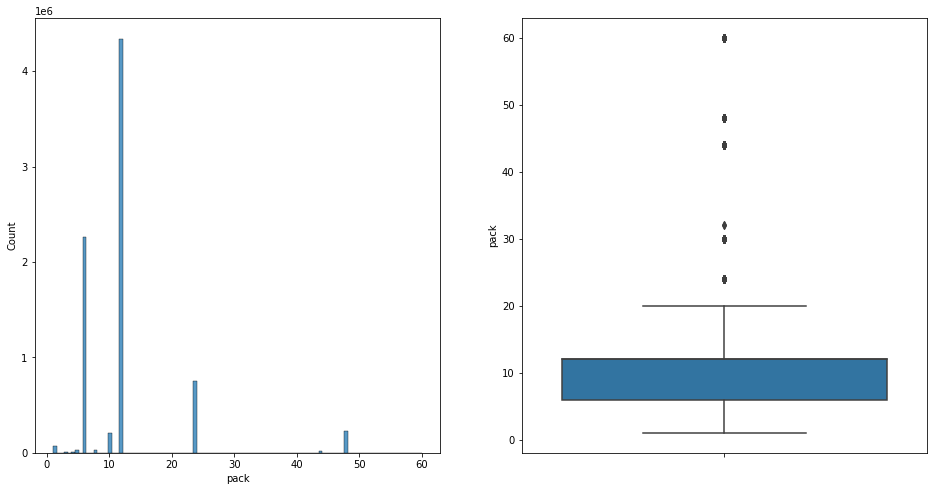

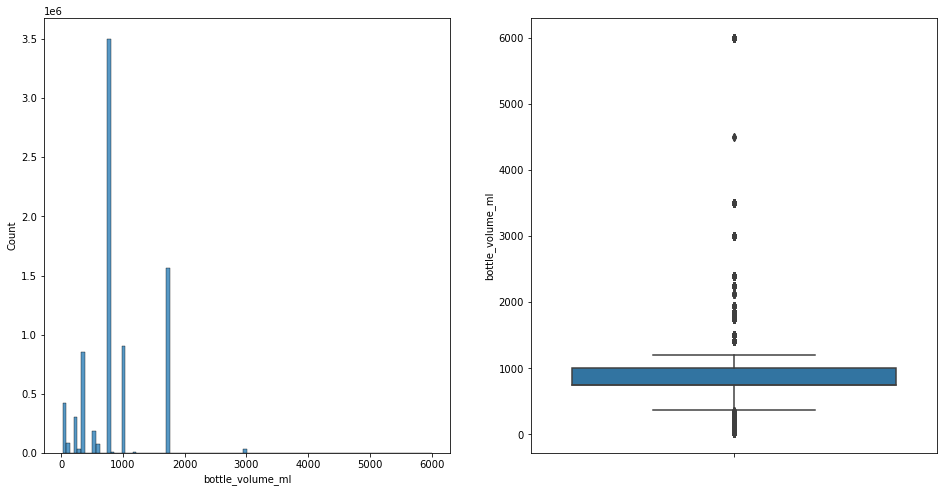

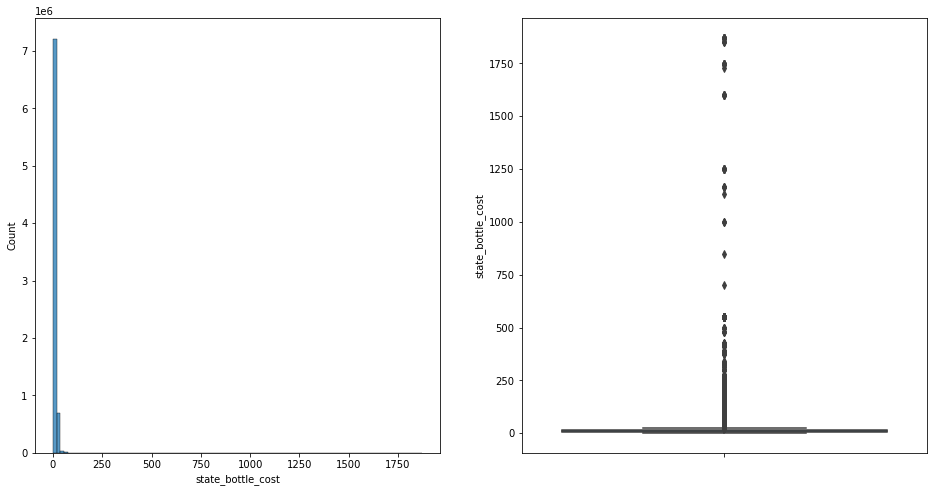

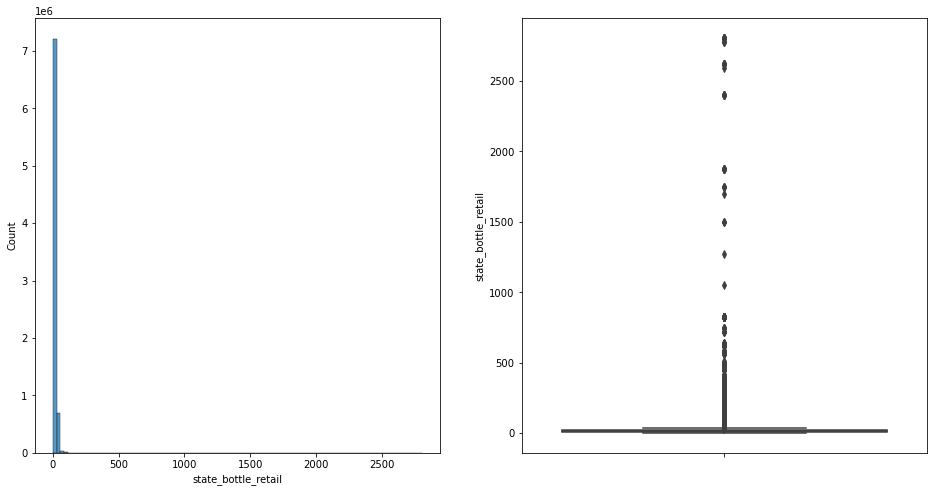

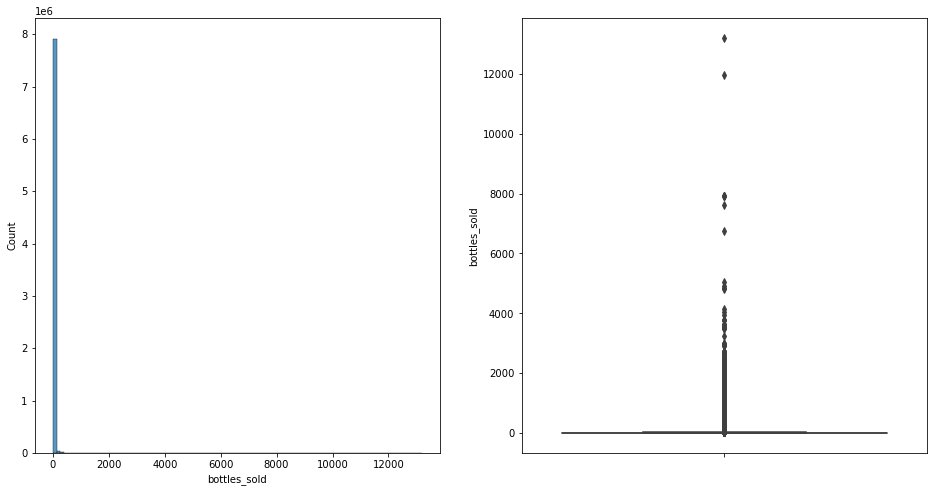

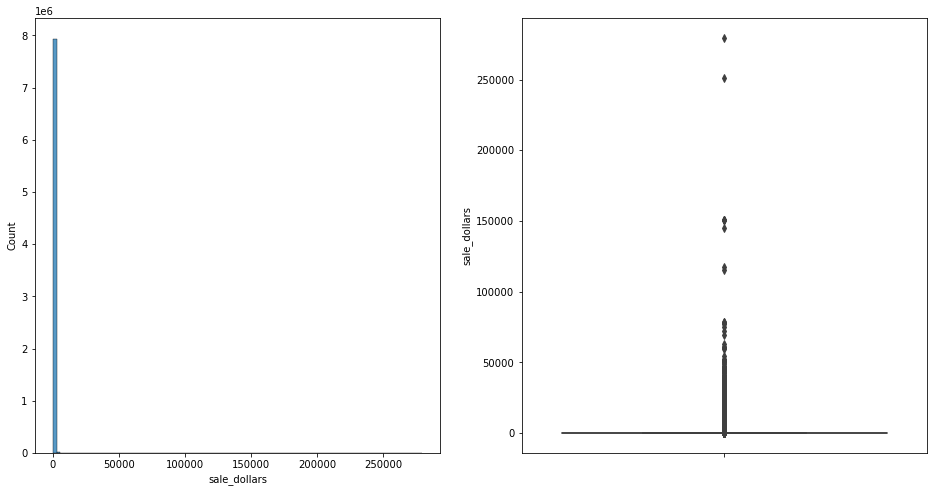

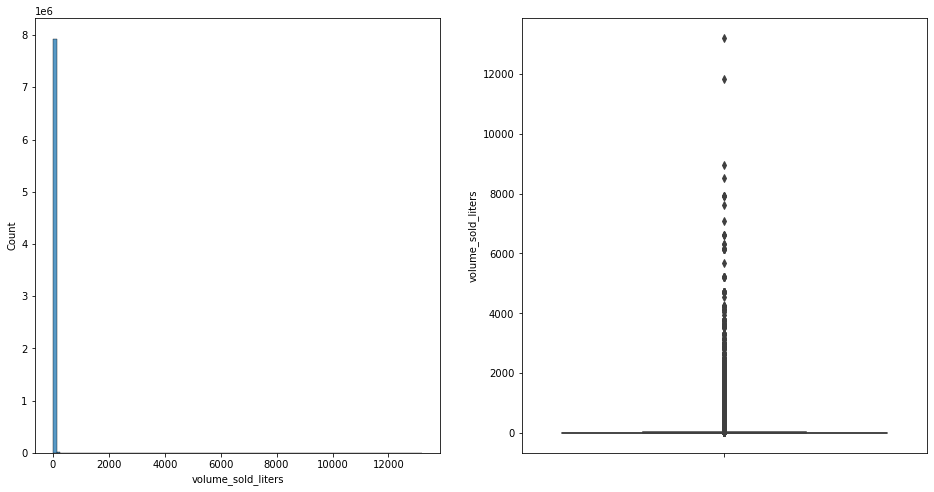

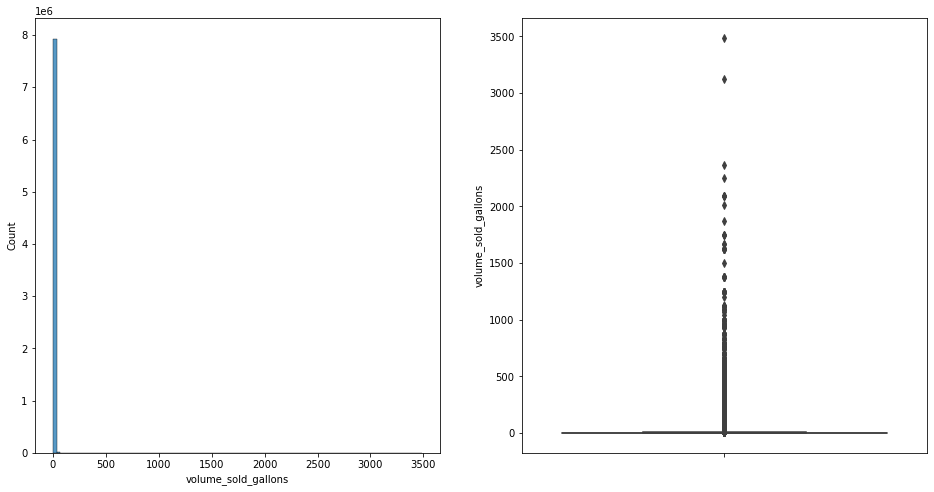

In [36]:
draw_hist_boxplot(liquor_df, num_feature)

**KEY TAKEAWAYS**

**Data Quality Issues**
1. Missing values
    - city: extract city from store_name
    - county: infer from the imputed values for missing city
    - category_name: impute based on category_name of the same items from other records
    - vendor_name: impute based on vendor_name of the same items from other records
2. Inconsistent values
    - (Completed) county: convert all values to all CAPS
    - (Completed) city: correct some spelling inconsistencies with a dictionary based on Wikipedia page
    - (Completed) vendor_name: standardise between different versions of vendor names
    - item_description and category_name
    - item_number and item_description: favour the longer description 
3. Features need to drop: 
    - Irrelevant features: invoice_and_item_number, store_number, store_name, address, zip_code, store_location
    - Duplicated features: county_number, category, vendor_number, item_number, volume_sold_gallons

**Data Preprocessing & Enrichment**
1. Date: Create new features for year, season, month, day of week, weekday and weekend, holidays 
2. sale_dollars, bottles_sold, volume_sold_liters: Create new features with time lags (1 week, 3 days, 1 month and so on) to avoid looking-ahead bias
3. state_bottle_profit = state_bottle_retail - state_bottle_cost (Potential theory is that products with higher profit margin would be prioritised for better shelf display, thus having higher sales)
4. Heavily skewed numerical features: pack, bottle_volume_ml, sales_dollar, state_bottle_retail, state_bottle_cost, volume_sold_liters, volume_sold_gallons
5. Enrich with external dataset: Population by city or county